In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pathlib
from pathlib import Path 
from tqdm import tqdm 
import pandas as pd
import os
import torch
import scipy



import warnings
warnings.filterwarnings("ignore")

In [2]:
from ReadImageBin  import ImageBin,rescale_transform

In [3]:
def sort_txt_bin(path):
    """
    input:path is a string, which is the directory of the files (image bins and txt)
    :return:image_bin: a list containing name of all image bins  ( not directory included)
         txt: a list containing name of all txt names
    """
    all_file=os.listdir(path)  ## return the names of all files, collected in a list
    image_bin=[]
    txt=[]
    for filename in all_file:
        if filename.endswith('.txt'):
            txt.append(filename)
        elif filename.endswith('.bin') :
            image_bin.append(filename)
        else: continue   
     
    
    return image_bin,txt



def findtxt(target,scope):
    """ this is to do the string match, match:
        target: the patient number you want to find, should be a string , such as N152934550
        scope: the txt list you want to find in this scope 
        
        return:name of matched txt, should be a string
         if not found, return ValueError
    """
    count=0
    for txt in scope:
        pos=txt.find(target)
        if pos==0:
            return scope[count]
        else: count+=1

    raise ValueError('You did not setup the right scope or target')

def pair_bin_txt(path):
    """
    Purpose:
       this is to make pair of image.bin file and .txt, because not all the files are paired, so this function act as filter to select the data could be utilized.
    Args:
       image_bin: a list which contains all the image_bin names
       txt: a list which contains all the txt file names.
   return :
       paired image_bin, paired txt. patients name
    
    """
    image_bin,txt=sort_txt_bin(path)
    ## patients_bin ans_d patients_txt are lists for patients number, containing  N152934550 etc.
    patients_bin=[]
    patients_txt=[]
    ##form: ['N152934550.image.bin'.....##
    for patient in image_bin:
        patient_trun=patient.split('.')
        patients_bin.append(patient_trun[0])
    ##form : ['N152934550_2020.11.16_anon.txt'.....]##
    for patient in txt:
        patient_trun=patient.split('_')
        patients_txt.append(patient_trun[0])
        
    ##convert to set and find intersection of two sets
    bin_set=set(patients_bin)
    txt_set=set(patients_txt)
    bin_txt_set=bin_set.intersection(txt_set)
    
    ## bin set and txt file
    final_bin=[]
    final_txt=[]
    patients_name=list(bin_txt_set)  ## intersection
    
    for patient in patients_name:
        #first concatenate  image.bin
        patient_bin=patient+'.'+'image'+'.'+'bin'
        final_bin.append(patient_bin)
        
        ## concatenate  txt:
        patient_txt=findtxt(patient,txt)
        final_txt.append(patient_txt)
    
    return final_bin, final_txt,patients_name

In [4]:
def extract_info(raw_datadir,transform=True):
    raw_datadir=Path(raw_datadir).resolve()
    pat_bin,pat_txt,patients_name=pair_bin_txt(raw_datadir)
    info=[]
    for i in range(len(pat_txt)):
        txt_df=pd.read_csv(raw_datadir/"{}".format(pat_txt[i]),sep=" :=",index_col=0,header=None)
        
        SRD_STRESS_DIST=float(txt_df.loc["SRD_STRESS_DIST(03)"])
        SRD_REST_DIST=float(txt_df.loc["SRD_REST_DIST(03)"])
        
        CTR_VOLUMES_stress=float(txt_df.loc["CTR_VOLUMES(00)"])
        CTR_VOLUMES_rest=float(txt_df.loc["CTR_VOLUMES(01)"])
        ENDO_VOLUMES_stress=float(txt_df.loc["ENDO_VOLUMES(00)"])
        ENDO_VOLUMES_rest=float(txt_df.loc["ENDO_VOLUMES(01)"])
        TID=float(txt_df.loc["TID_INDEX"])
        ischemia=float(txt_df.loc["SRD_ISCHEMIA_DIST(01)"])
        scar=float(txt_df.loc["SRD_ISCHEMIA_DIST(02)"])
        
        info.append([CTR_VOLUMES_stress,CTR_VOLUMES_rest,ENDO_VOLUMES_stress,ENDO_VOLUMES_rest,TID,ischemia,scar,SRD_STRESS_DIST,SRD_REST_DIST])
    info=np.asarray(info)
    colume=['CTR_VOLUMES_stress','CTR_VOLUMES_rest','ENDO_VOLUMES_stress','ENDO_VOLUMES_rest','TID','ischemia','scar','SRD_STRESS_DIST','SRD_REST_DIST']
    return info,patients_name,colume
    

In [5]:
l_bin,ltxt=sort_txt_bin('DUMP')
print("number of image bin is " , len(l_bin))
print("number of txt is " , len(ltxt))

number of image bin is  267
number of txt is  237


In [6]:
pat_mat,patients_name,colume=extract_info('DUMP')

In [7]:
print(patients_name)
print(colume)
print(pat_mat.shape)

['N152063293', 'N183614958', 'N185459262', 'N181665328', 'N182001439', 'N181170038', 'N153717102', 'N183842140', 'N185193283', 'N182420606', 'N182886495', 'N151767359', 'N179632735', 'N184734820', 'N181731508', 'N182819249', 'N183320312', 'N153217721', 'N183444016', 'N154231861', 'N183791684', 'N184392758', 'N185481229', 'N186095884', 'N182646844', 'N185174091', 'N184606184', 'N181695048', 'N152977401', 'N186000546', 'N183813281', 'N185352303', 'N183101692', 'N183339375', 'N183772162', 'N184340930', 'N184576644', 'N153567021', 'N185034943', 'N182747858', 'N153088966', 'N184214570', 'N185357192', 'N185837150', 'N183512931', 'N183697394', 'N153328533', 'N184607161', 'N182899628', 'N183878403', 'N184730856', 'N184961971', 'N185326362', 'N181996749', 'N186344726', 'N184335140', 'N184880778', 'N182098033', 'N183697832', 'N186047663', 'N153605004', 'N182676766', 'N182835936', 'N183315676', 'N184022648', 'N184726702', 'N183358792', 'N153179542', 'N183680623', 'N154768091', 'N181996551', 'N183

In [8]:
TID=pat_mat[:,4]
sorted_TID=np.argsort(TID)
print(TID[sorted_TID])
print(patients_name[sorted_TID[-3]])

[ 76.4248  77.8067  82.0741  82.9053  83.617   83.8377  85.7164  87.4367
  88.3322  89.1675  89.4044  89.4705  89.8775  90.1307  90.2703  90.3688
  90.3848  90.673   90.7939  91.0135  91.6642  92.0147  92.0869  92.2669
  92.5001  92.5963  92.8198  93.1538  93.3567  93.7579  93.7784  93.8698
  94.0477  94.2091  94.4263  94.572   94.6197  94.9924  95.2926  95.3546
  95.4568  96.1374  96.148   96.2959  96.3399  96.6239  96.8488  97.0085
  97.0846  97.1842  97.4553  97.5415  97.5534  97.5605  97.561   97.8327
  98.4084  98.4233  98.4793  98.5537  98.678   98.7587  98.7888  98.9042
  98.9746  99.0586  99.3075  99.6228  99.7906 100.148  100.178  100.293
 100.349  100.424  100.542  100.662  100.725  100.85   100.94   101.
 101.081  101.166  101.304  101.376  101.465  101.594  101.762  101.821
 101.986  102.019  102.147  102.192  102.325  102.358  102.409  102.554
 102.564  102.571  102.613  102.637  102.933  102.938  103.111  103.137
 103.291  103.318  103.475  103.541  103.703  103.765  104.

In [9]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [11]:
stress_dist,rest_dist=pat_mat[:,-2],pat_mat[:,-1]
print(stress_dist)
print(rest_dist)

[ 54.0541  78.3784  89.1892  97.2973  97.2973  78.3784  43.2432  94.5946
  97.2973  81.0811  86.4865  67.5676  81.0811  89.1892 100.      81.0811
  91.8919  83.7838  75.6757  91.8919  81.0811  81.0811  94.5946  75.6757
  97.2973  83.7838  91.8919  83.7838  89.1892  78.3784  89.1892  94.5946
  83.7838  86.4865  94.5946  72.973   62.1622 100.      94.5946  43.2432
  91.8919  78.3784  91.8919  67.5676  86.4865  67.5676  67.5676  37.8378
  78.3784  97.2973  64.8649  75.6757  35.1351  83.7838  94.5946  67.5676
  64.8649  62.1622  78.3784  64.8649  45.9459 100.     100.     100.
  86.4865  59.4595  75.6757 100.      89.1892  62.1622  48.6487  97.2973
  97.2973  62.1622  94.5946  64.8649  72.973   94.5946  89.1892  86.4865
  91.8919  91.8919  97.2973  94.5946  83.7838  72.973   72.973   91.8919
  67.5676  94.5946  81.0811  45.9459 100.      89.1892  78.3784  91.8919
 100.      86.4865  72.973   83.7838  70.2703  91.8919  67.5676 100.
  81.0811  75.6757  94.5946  83.7838  91.8919  86.4865  97.

In [12]:
stress_dist<71
abnormal_pat=pat_mat[stress_dist<71,:]
print(abnormal_pat.shape)

ischemia_abnormal=abnormal_pat[:,5]
scar_abnormal=abnormal_pat[:,6]


(51, 9)


Text(0.5, 1.0, 'ischemia extent')

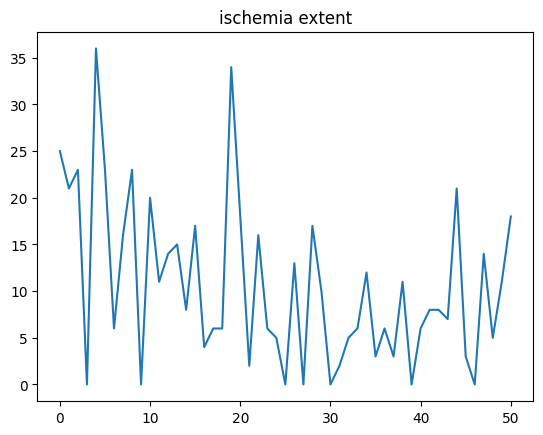

In [14]:
plt.figure()
plt.plot(ischemia_abnormal)
plt.title('ischemia extent')

Text(0.5, 1.0, 'scar extent')

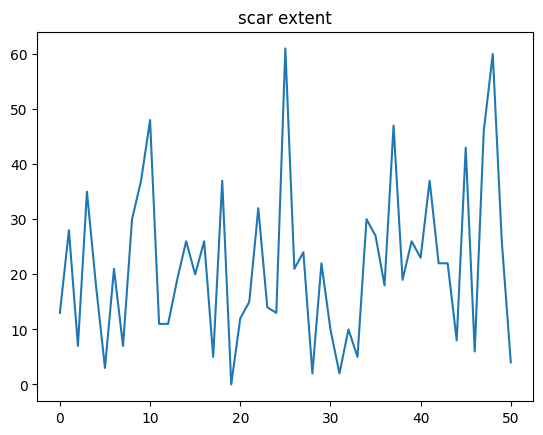

In [15]:
plt.figure()
plt.plot(scar_abnormal)
plt.title('scar extent')

[ 54.0541  78.3784  89.1892  97.2973  97.2973  78.3784  43.2432  94.5946
  97.2973  81.0811  86.4865  67.5676  81.0811  89.1892 100.      81.0811
  91.8919  83.7838  75.6757  91.8919  81.0811  81.0811  94.5946  75.6757
  97.2973  83.7838  91.8919  83.7838  89.1892  78.3784  89.1892  94.5946
  83.7838  86.4865  94.5946  72.973   62.1622 100.      94.5946  43.2432
  91.8919  78.3784  91.8919  67.5676  86.4865  67.5676  67.5676  37.8378
  78.3784  97.2973  64.8649  75.6757  35.1351  83.7838  94.5946  67.5676
  64.8649  62.1622  78.3784  64.8649  45.9459 100.     100.     100.
  86.4865  59.4595  75.6757 100.      89.1892  62.1622  48.6487  97.2973
  97.2973  62.1622  94.5946  64.8649  72.973   94.5946  89.1892  86.4865
  91.8919  91.8919  97.2973  94.5946  83.7838  72.973   72.973   91.8919
  67.5676  94.5946  81.0811  45.9459 100.      89.1892  78.3784  91.8919
 100.      86.4865  72.973   83.7838  70.2703  91.8919  67.5676 100.
  81.0811  75.6757  94.5946  83.7838  91.8919  86.4865  97.

In [9]:
sorted_stress=np.argsort(stress_dist)
print(sorted_stress)
print(stress_dist[sorted_stress])
sorted_rest=np.sort(rest_dist)
print(sorted_rest)


[ 93  87   1  76   6  72  62  60  88  99  79 105 115 113   4  55  97   8
  86  56 103   3  27  18  19  20  84  58  90  33  26  10  41  69  28  31
  15  48  96  21  51  11  82  95  29  23  89  35  59 114  61   2  70  54
  13   7  42 112  71  74  77  80  83 110 109  67   0  57  46  66 108  32
  78  40  81  47  49  22 101 104  12   9  36  38  24 100  30  65  63  73
  44  45  64  37 107  50  14  16  94  92  68  34   5 106 111  52  17 102
  39  98  75  25  43  85  53  91]
[ 35.1351  37.8378  43.2432  48.6487  48.6487  51.3513  59.4595  59.4595
  59.4595  59.4595  62.1622  62.1622  62.1622  62.1622  62.1622  64.8649
  64.8649  64.8649  67.5676  67.5676  67.5676  67.5676  67.5676  70.2703
  70.2703  70.2703  70.2703  72.973   72.973   72.973   72.973   72.973
  75.6757  75.6757  75.6757  78.3784  78.3784  78.3784  78.3784  78.3784
  81.0811  81.0811  81.0811  81.0811  81.0811  81.0811  81.0811  81.0811
  81.0811  83.7838  83.7838  83.7838  83.7838  83.7838  83.7838  83.7838
  83.7838  83.7838

# For Frequency Analysis

## Normal:
### Stress threshold: 89
### rest threshold:90

## Abornal:
### Stress threshold: 71
### rest threshold:73  
rest :t  
72.9730  mildly abnormal   
75.6757  normal

In [27]:
import scipy
from scipy.stats import shapiro,ttest_ind,mannwhitneyu,linregress,pearsonr
def plot(c1,stress_dist,rest_dist,colume,num_bins=10):
    """c1 : colume ,such as TID"""
    _,p_shapiro=shapiro(c1)
    print("if p<0.05, we reject this is gaussian distributed")
    print(p_shapiro)
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,5))
    
    ## histogram of c1
    ax1.hist(c1,num_bins)
    ax1.set_xlabel('{}'.format(colume))
    ax1.set_ylabel("counts")
    ax1.set_title('Histogram of {} \n  p-value of shapiro test : {:.4g}'.format(colume,p_shapiro))
    ax1.axvline(x=np.mean(c1),ymax=np.max(c1),color='red',linestyle='--',label='Mean Value {}'.format(np.mean(c1)))
    ax1.axvline(x=np.median(c1),ymax=np.max(c1),color='black',linestyle='--',label='Median Value {}'.format(np.median(c1)))
    ax1.legend()
    r_stress,p_value=pearsonr(c1,stress_dist)
    r_rest,p_rest=pearsonr(c1,rest_dist)
    print("Pearson test  between normal stress distribution  (Confidence_level = 0.95) : ")
    print("pearson r: {} and p-value: {}".format( r_stress,p_value) )
    print("Pearson test  between normal rest distribution  (Confidence_level = 0.95) : ")
    print("pearson r: {} and p-value: {}".format( r_rest,p_rest))    
    
    ##c1 against stress_dist

    ax2.set_xlabel('stress distribution (normal)')
    ax2.set_ylabel('{}'.format(colume))
    ax2.set_title('{} against stress_distribution \n'.format(colume)+"pearson r: {:.4g} and p-value: {:.4g}".format( r_stress,p_value))
    ax2.scatter(stress_dist,c1,c='green')
    
    ## c1 against  rest_dist

    ax3.set_xlabel('rest distribution  (normal)')
    ax3.set_ylabel('{}'.format(colume))
    ax3.set_title('{} against rest distribution \n'.format(colume)+"pearson r: {:.4g} and p-value: {:.4g}".format( r_rest,p_rest))
    ax3.scatter(rest_dist,c1,c='green')

    
    f.tight_layout()
    plt.savefig('{}'.format(colume))
    

    plt.show()
    

if p<0.05, we reject this is gaussian distributed
3.0419509133849942e-09
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.3632927859917402 and p-value: 6.117075887754354e-05
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.41473075260860914 and p-value: 3.6810697370718496e-06


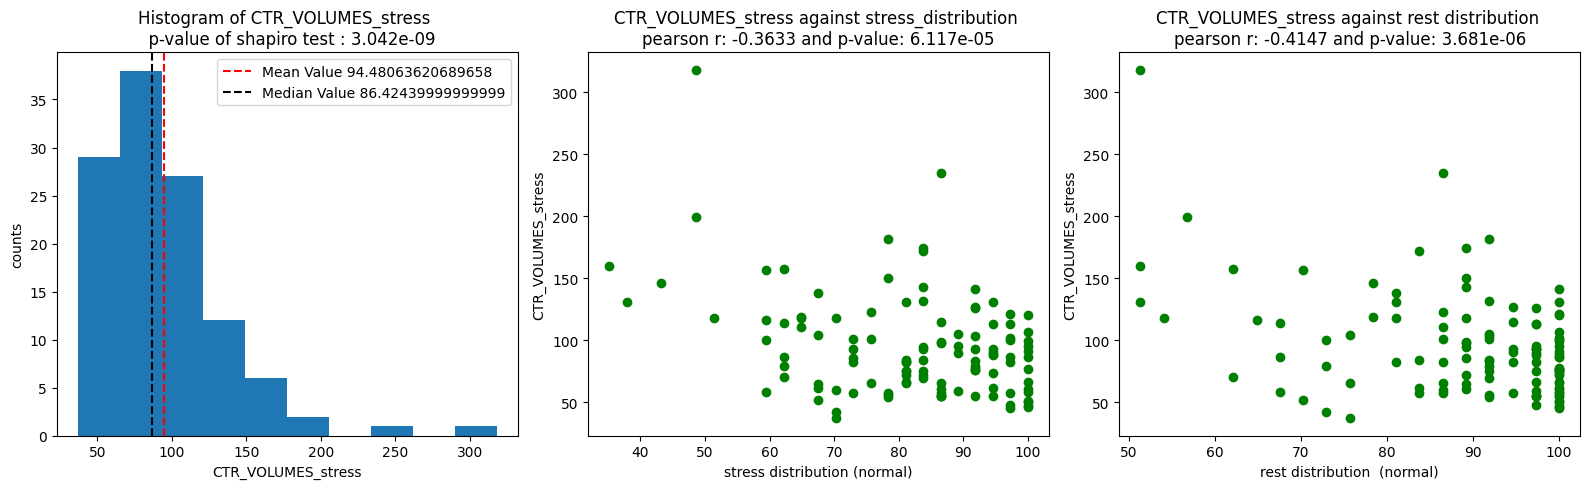

In [28]:
plot(pat_mat[:,0],pat_mat[:,-2],pat_mat[:,-1],colume=colume[0])

if p<0.05, we reject this is gaussian distributed
3.0419509133849942e-09
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.3632927859917402 and p-value: 6.117075887754354e-05
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.41473075260860914 and p-value: 3.6810697370718496e-06


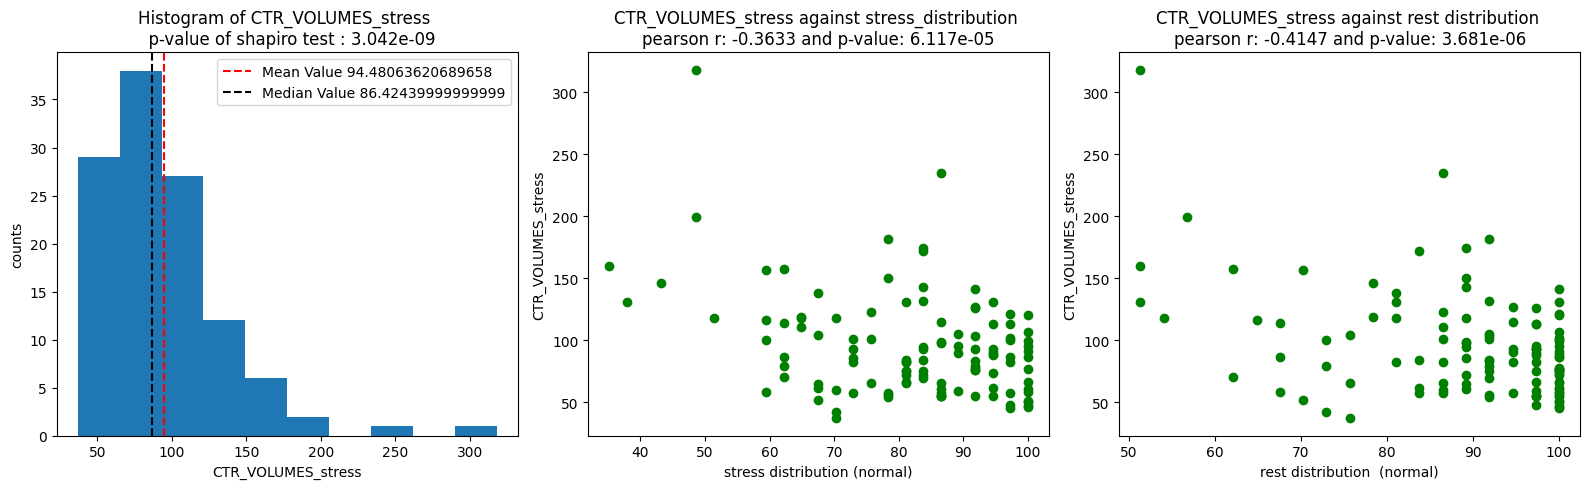

if p<0.05, we reject this is gaussian distributed
6.413108710745519e-09
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.2965210513683222 and p-value: 0.0012290383871973274
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.35797563777129177 and p-value: 7.968982830179959e-05


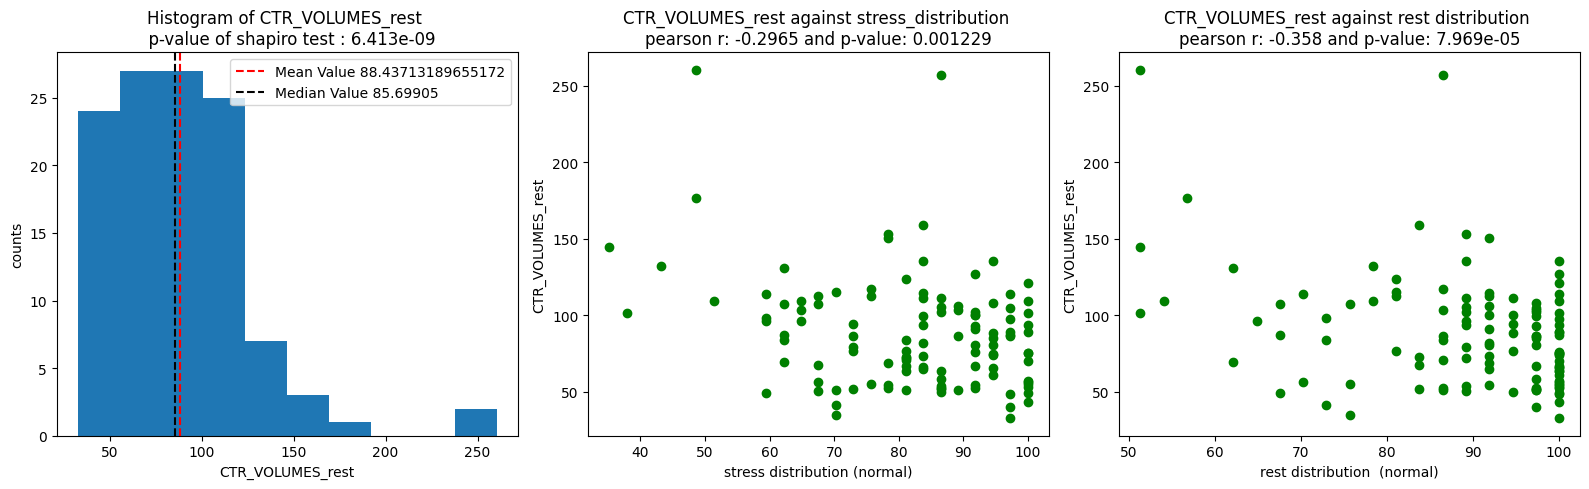

if p<0.05, we reject this is gaussian distributed
9.528146049930797e-10
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.3642206284260282 and p-value: 5.838391537738213e-05
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.41750629116649524 and p-value: 3.1200679409402237e-06


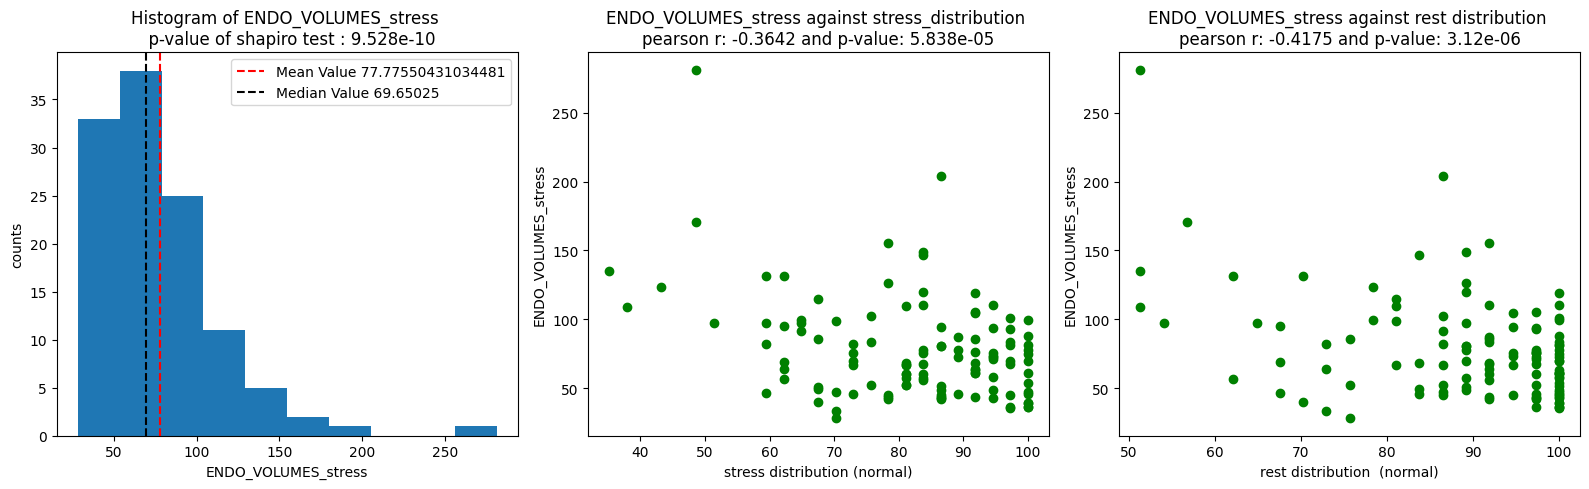

if p<0.05, we reject this is gaussian distributed
1.9672103945822528e-09
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.2971294703558155 and p-value: 0.0011994885408181937
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.3604590757983495 and p-value: 7.047062485509984e-05


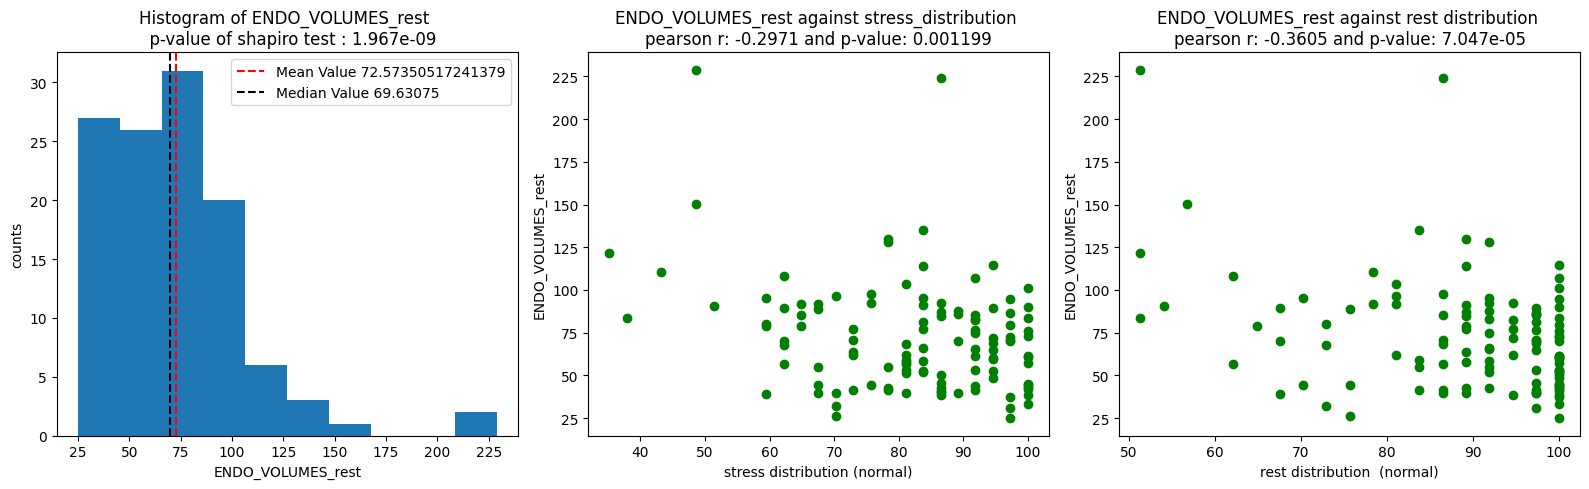

if p<0.05, we reject this is gaussian distributed
0.037886906415224075
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.20597370618276392 and p-value: 0.026539670163172973
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.1612217565320478 and p-value: 0.0838205412190464


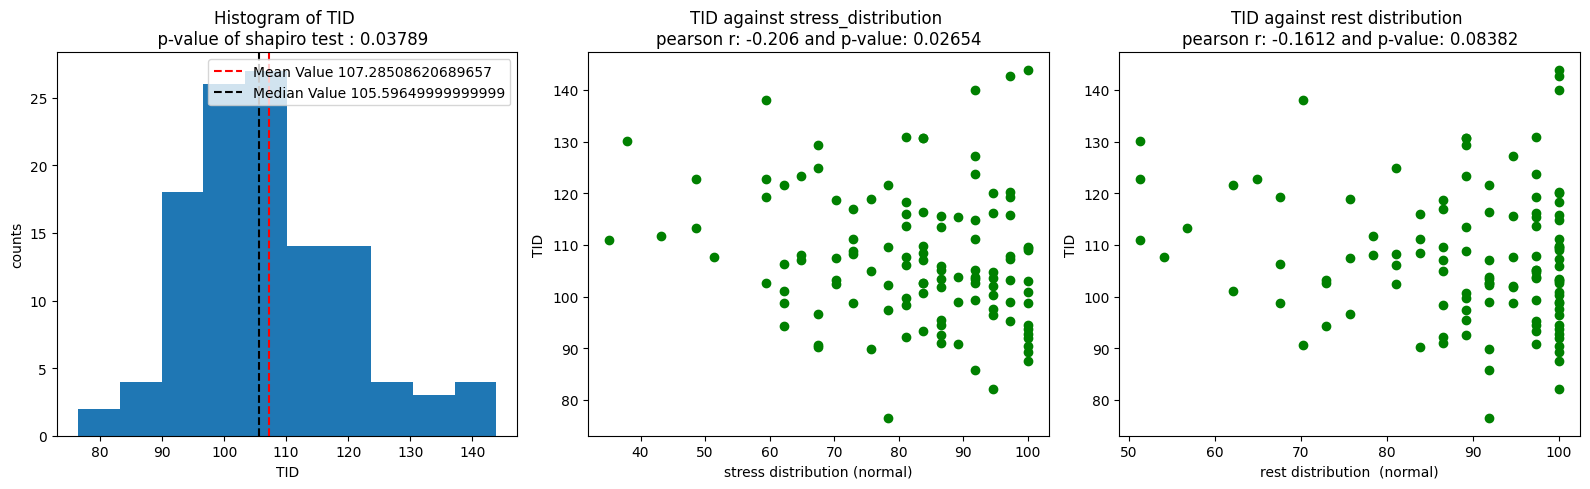

if p<0.05, we reject this is gaussian distributed
1.4560490058102005e-07
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: 0.14423153247784187 and p-value: 0.12242208262516342
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: 0.08154215334613672 and p-value: 0.3842046982190634


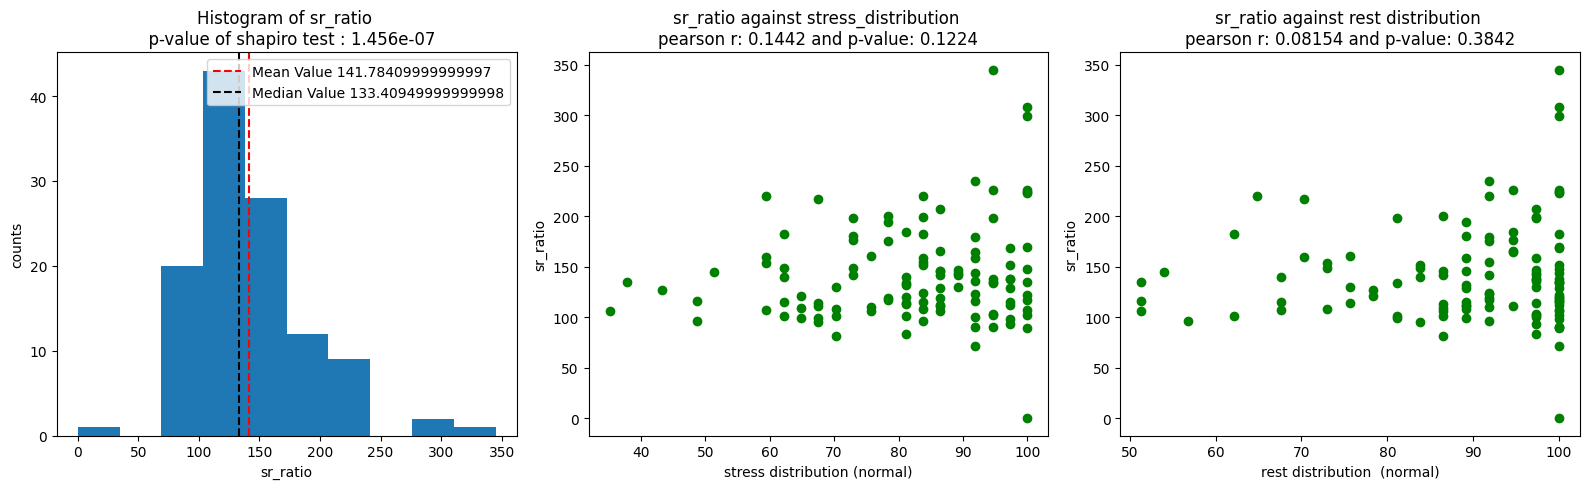

if p<0.05, we reject this is gaussian distributed
2.515168489480857e-06
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: 1.0 and p-value: 0.0
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: 0.9001921183997064 and p-value: 5.770083078520842e-43


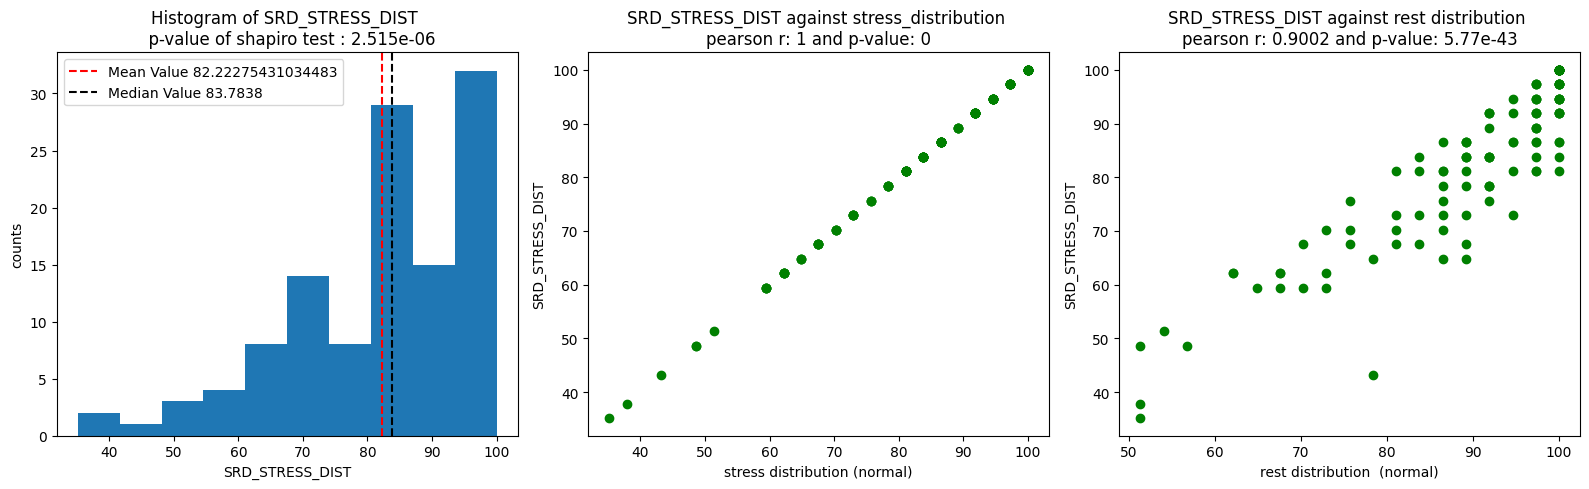

if p<0.05, we reject this is gaussian distributed
6.729031915009287e-11
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: 0.9001921183997064 and p-value: 5.770083078520842e-43
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: 1.0 and p-value: 0.0


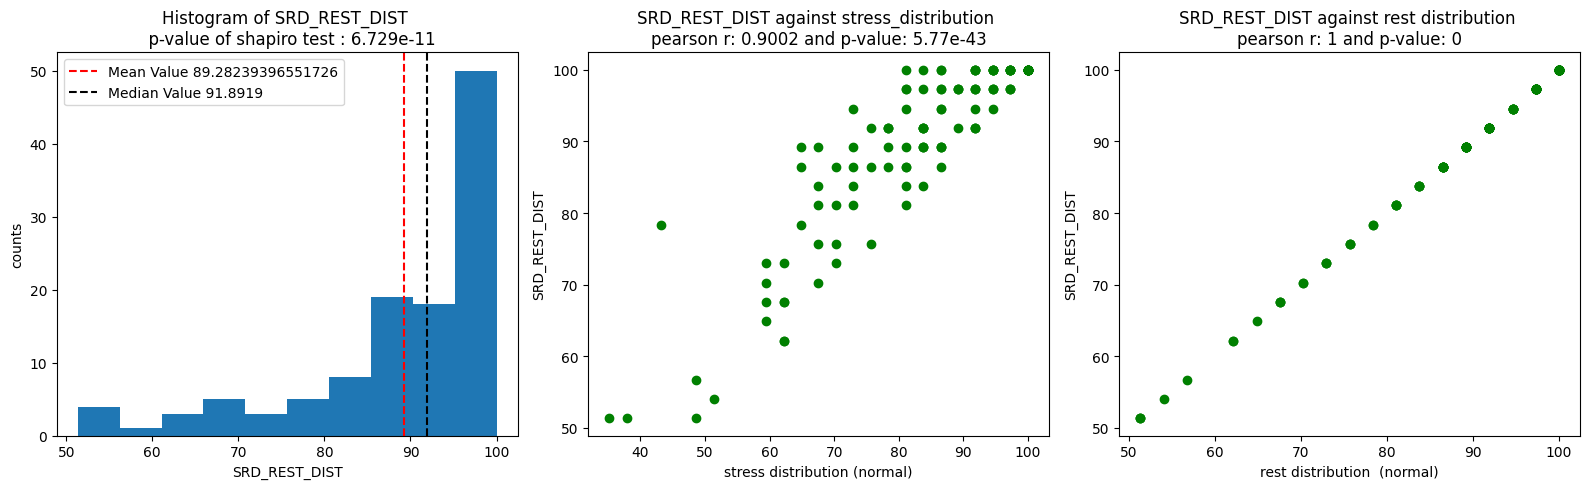

In [29]:
for i in range(pat_mat.shape[1]):
    plot(pat_mat[:,i],pat_mat[:,-2],pat_mat[:,-1],colume=colume[i])

if p<0.05, we reject this is gaussian distributed
0.02382582239806652
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.20595621515703327 and p-value: 0.02655279274756153
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.1625386116129389 and p-value: 0.0812902962533942


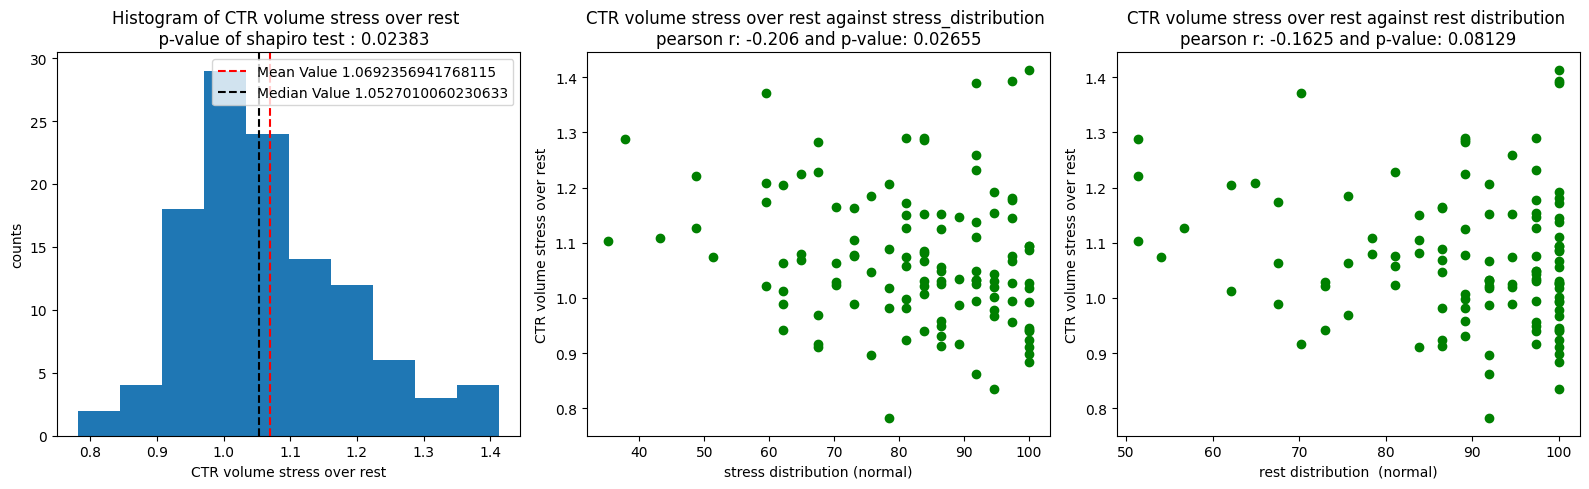

In [34]:
## CTR volume stress/rest
plot(pat_mat[:,0]/pat_mat[:,1],pat_mat[:,-2],pat_mat[:,-1],colume="CTR volume stress over rest")

if p<0.05, we reject this is gaussian distributed
2.8456995551096043e-06
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.3494204948892442 and p-value: 0.00012078275144095918
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.33938794389679294 and p-value: 0.00019378494346481527


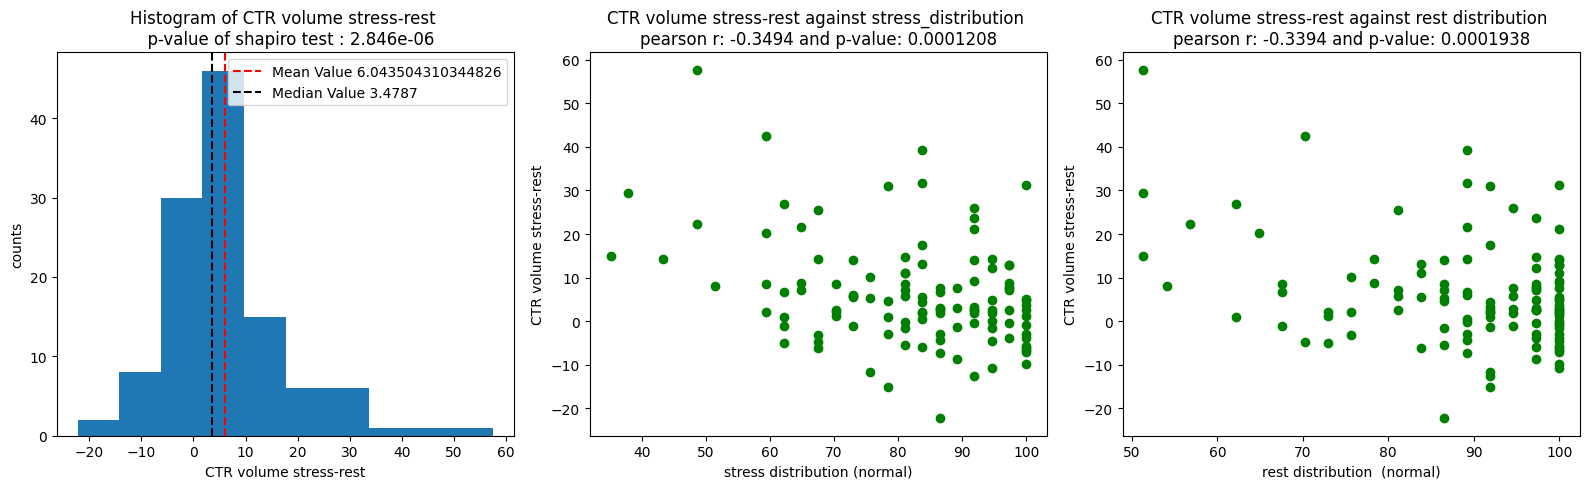

In [35]:
## CTR volume stress-rest
plot(pat_mat[:,0]-pat_mat[:,1],pat_mat[:,-2],pat_mat[:,-1],colume="CTR volume stress-rest")

if p<0.05, we reject this is gaussian distributed
0.037893146276474
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.20597129047905738 and p-value: 0.02654148220783271
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.16121890586991622 and p-value: 0.08382608603720137


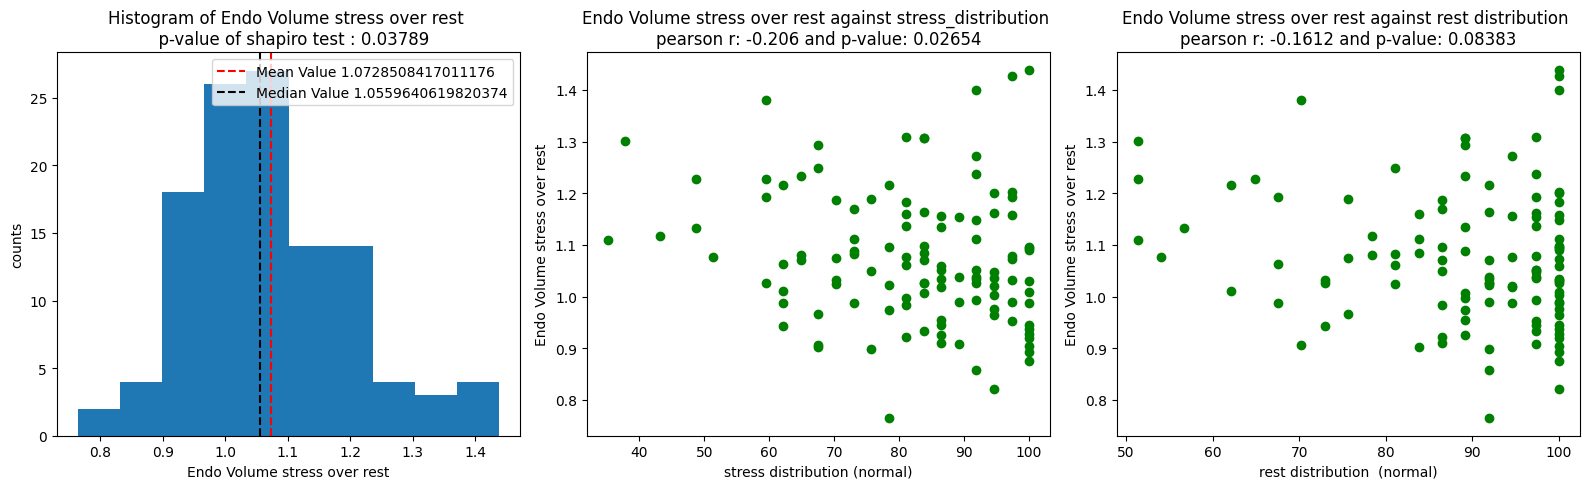

In [36]:
## Endo Volume stress/rest
plot(pat_mat[:,2]/pat_mat[:,3],pat_mat[:,-2],pat_mat[:,-1],colume="Endo Volume stress over rest")

if p<0.05, we reject this is gaussian distributed
1.2192912208774942e-06
Pearson test  between normal stress distribution  (Confidence_level = 0.95) : 
pearson r: -0.3557190259657378 and p-value: 8.903093505331296e-05
Pearson test  between normal rest distribution  (Confidence_level = 0.95) : 
pearson r: -0.3466480314100826 and p-value: 0.00013785914994425137


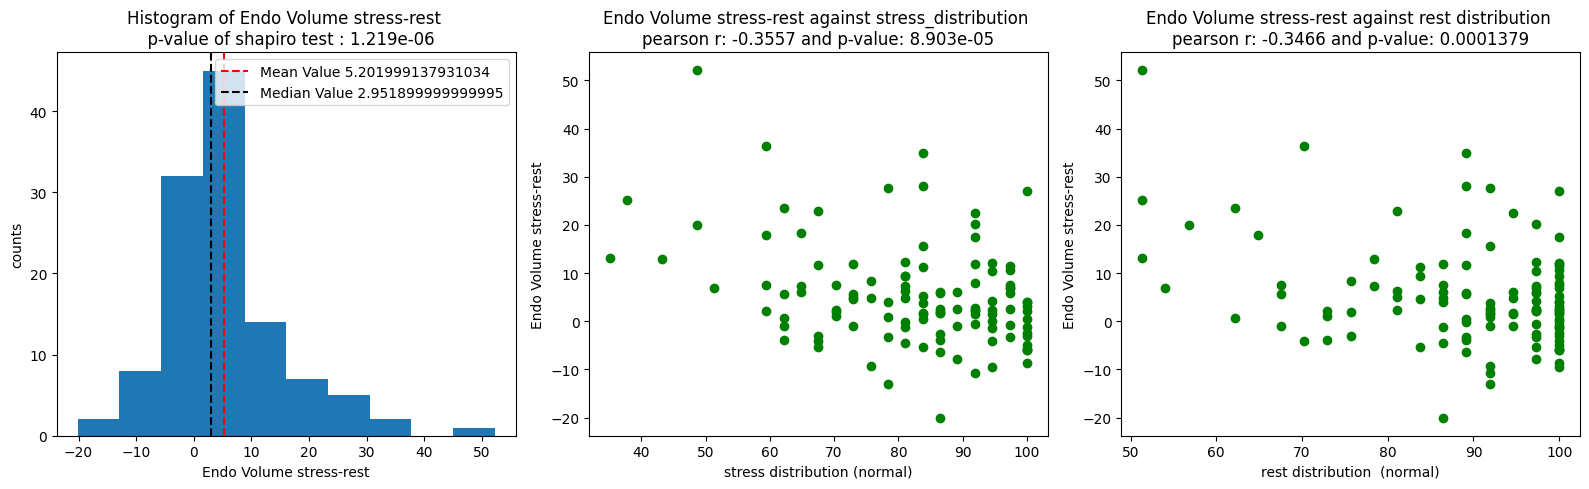

In [37]:
## Endo Volume stress-rest
plot(pat_mat[:,2]-pat_mat[:,3],pat_mat[:,-2],pat_mat[:,-1],colume="Endo Volume stress-rest")

In [61]:
pat_bin,pat_txt,pat_name=pair_bin_txt('DUMP')
arr5=ImageBin('DUMP'+'/'+pat_bin[0]).combine_5()

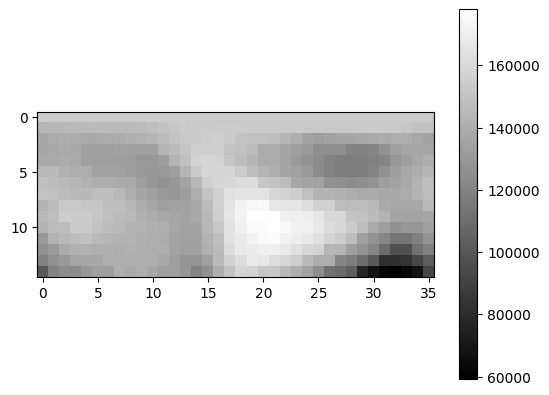

In [62]:
plt.figure()
plt.imshow(arr5[0,:,:],cmap='gray')
plt.colorbar()

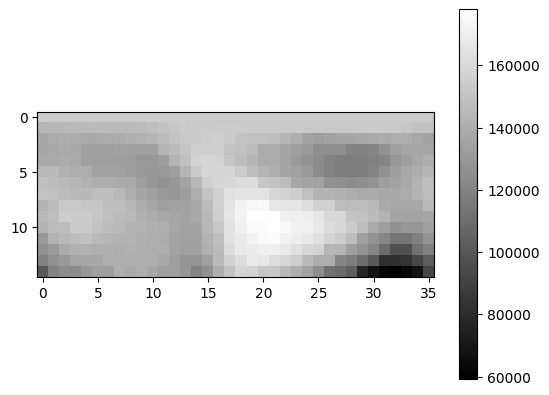

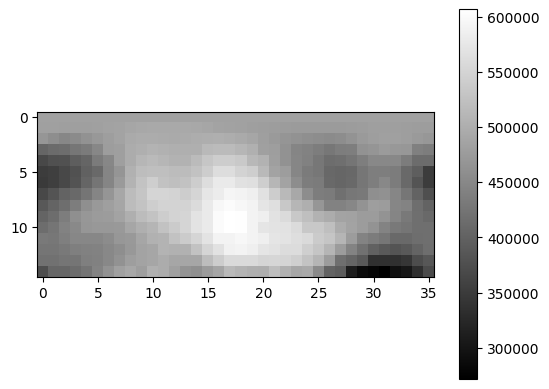

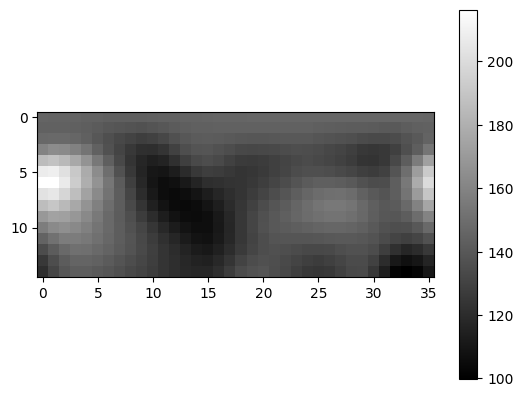

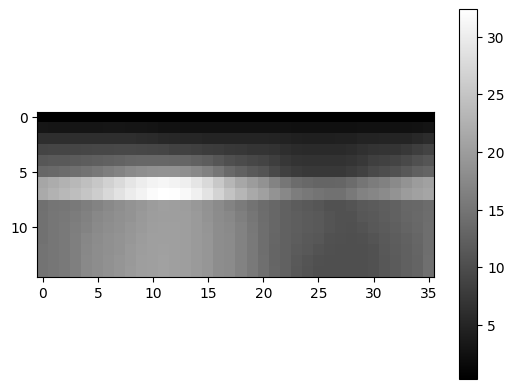

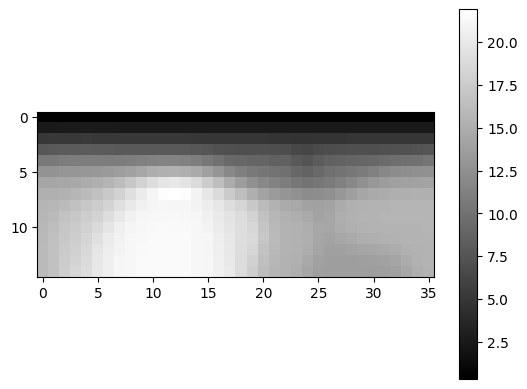

In [63]:
for i in range(5):
    plt.figure()
    plt.imshow(arr5[i,:,:],cmap='gray')
    plt.colorbar()